# Simplified Revenue Forecasting

This notebook demonstrates a streamlined approach to revenue forecasting using historical data and statistical models.

**Workflow:**
1. Load and explore revenue data
2. Build ARIMA forecast model
3. Build SARIMAX forecast model
4. Compare model performance
5. Visualize results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('synthetic_financial_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.set_index('date', inplace=True)

print(f"Data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"\nFirst few rows:")
df.head()

Data shape: (55, 5)
Date range: 2021-01-01 00:00:00 to 2025-07-01 00:00:00

First few rows:


,Revenue,COGS,OPEX,Gross_Margin,EBITDA
date,,,,,
2021-01-01,9.455786e+06,4.089843e+06,3.191941e+06,5.365943e+06,2.174002e+06
2021-02-01,9.677157e+06,4.206663e+06,3.159497e+06,5.470495e+06,2.310998e+06
2021-03-01,9.970809e+06,4.342709e+06,3.246961e+06,5.628101e+06,2.381139e+06
2021-04-01,1.013293e+07,4.368044e+06,3.282934e+06,5.764882e+06,2.481948e+06
2021-05-01,1.000696e+07,4.365504e+06,3.112066e+06,5.641456e+06,2.529389e+06


## 1. Data Exploration

Let's start by visualizing the revenue data to understand trends and patterns.

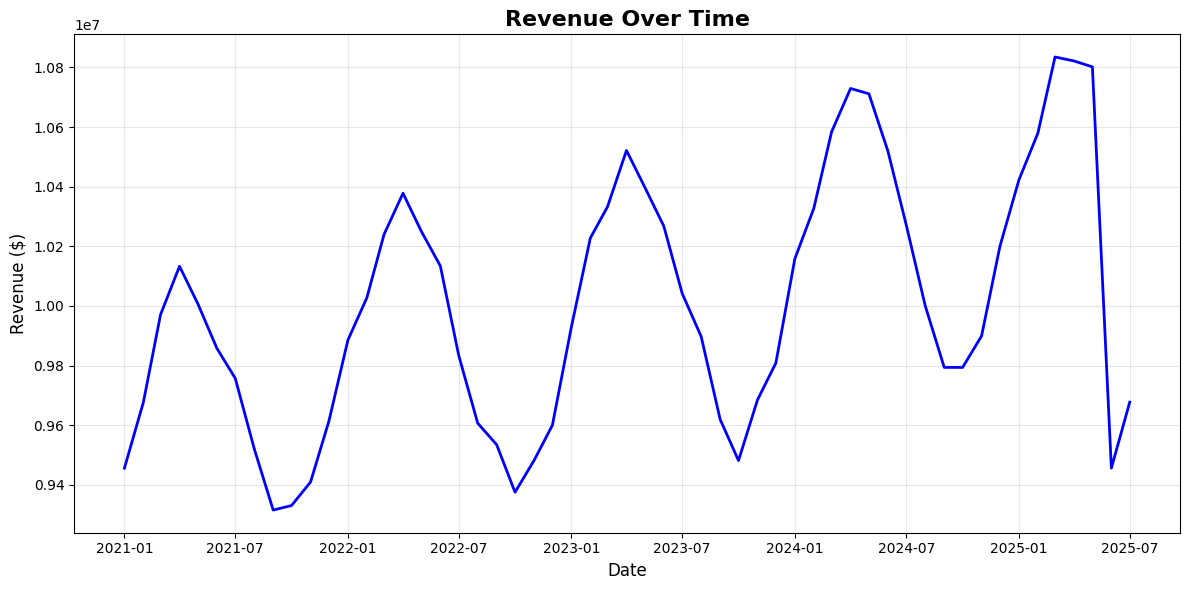

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Revenue'], linewidth=2, color='blue')
plt.title('Revenue Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [4]:
train_size = int(len(df) * 0.8)
train_data = df['Revenue'][:train_size]
test_data = df['Revenue'][train_size:]

print(f"Training set size: {len(train_data)} observations")
print(f"Test set size: {len(test_data)} observations")
print(f"\nTraining period: {train_data.index.min()} to {train_data.index.max()}")
print(f"Test period: {test_data.index.min()} to {test_data.index.max()}")

Training set size: 44 observations
Test set size: 11 observations

Training period: 2021-01-01 00:00:00 to 2024-08-01 00:00:00
Test period: 2024-09-01 00:00:00 to 2025-07-01 00:00:00


## 2. Model Building

Now we'll build two forecasting models to predict future revenue:
- **ARIMA**: A basic time series model that captures trends
- **SARIMAX**: An advanced model that captures both trends and seasonal patterns

In [5]:
print("Building ARIMA model...")
arima_model = ARIMA(train_data, order=(1, 1, 1))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=len(test_data))

arima_mae = mean_absolute_error(test_data, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
arima_r2 = r2_score(test_data, arima_forecast)

print(f"\nARIMA Model Performance:")
print(f"MAE: ${arima_mae:,.2f}")
print(f"RMSE: ${arima_rmse:,.2f}")
print(f"R²: {arima_r2:.4f}")

Building ARIMA model...

ARIMA Model Performance:
MAE: $462,469.74
RMSE: $539,798.51
R²: -0.2362


/Users/aarondiamond-reivich/Mito/mito/mito-ai/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aarondiamond-reivich/Mito/mito/mito-ai/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aarondiamond-reivich/Mito/mito/mito-ai/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
print("Building SARIMAX model...")
sarimax_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit(disp=False)

sarimax_forecast = sarimax_fit.forecast(steps=len(test_data))

sarimax_mae = mean_absolute_error(test_data, sarimax_forecast)
sarimax_rmse = np.sqrt(mean_squared_error(test_data, sarimax_forecast))
sarimax_r2 = r2_score(test_data, sarimax_forecast)

print(f"\nSARIMAX Model Performance:")
print(f"MAE: ${sarimax_mae:,.2f}")
print(f"RMSE: ${sarimax_rmse:,.2f}")
print(f"R²: {sarimax_r2:.4f}")

Building SARIMAX model...


/Users/aarondiamond-reivich/Mito/mito/mito-ai/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aarondiamond-reivich/Mito/mito/mito-ai/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



SARIMAX Model Performance:
MAE: $268,873.60
RMSE: $437,316.59
R²: 0.1886


/Users/aarondiamond-reivich/Mito/mito/mito-ai/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMAX'],
    'MAE': [arima_mae, sarimax_mae],
    'RMSE': [arima_rmse, sarimax_rmse],
    'R²': [arima_r2, sarimax_r2]
})

comparison_df['MAE'] = comparison_df['MAE'].apply(lambda x: f'${x:,.2f}')
comparison_df['RMSE'] = comparison_df['RMSE'].apply(lambda x: f'${x:,.2f}')
comparison_df['R²'] = comparison_df['R²'].apply(lambda x: f'{x:.4f}')

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)
print("\nBest Model: SARIMAX (captures seasonal patterns)")


MODEL COMPARISON SUMMARY
  Model         MAE        RMSE      R²
  ARIMA $462,469.74 $539,798.51 -0.2362
SARIMAX $268,873.60 $437,316.59  0.1886

Best Model: SARIMAX (captures seasonal patterns)


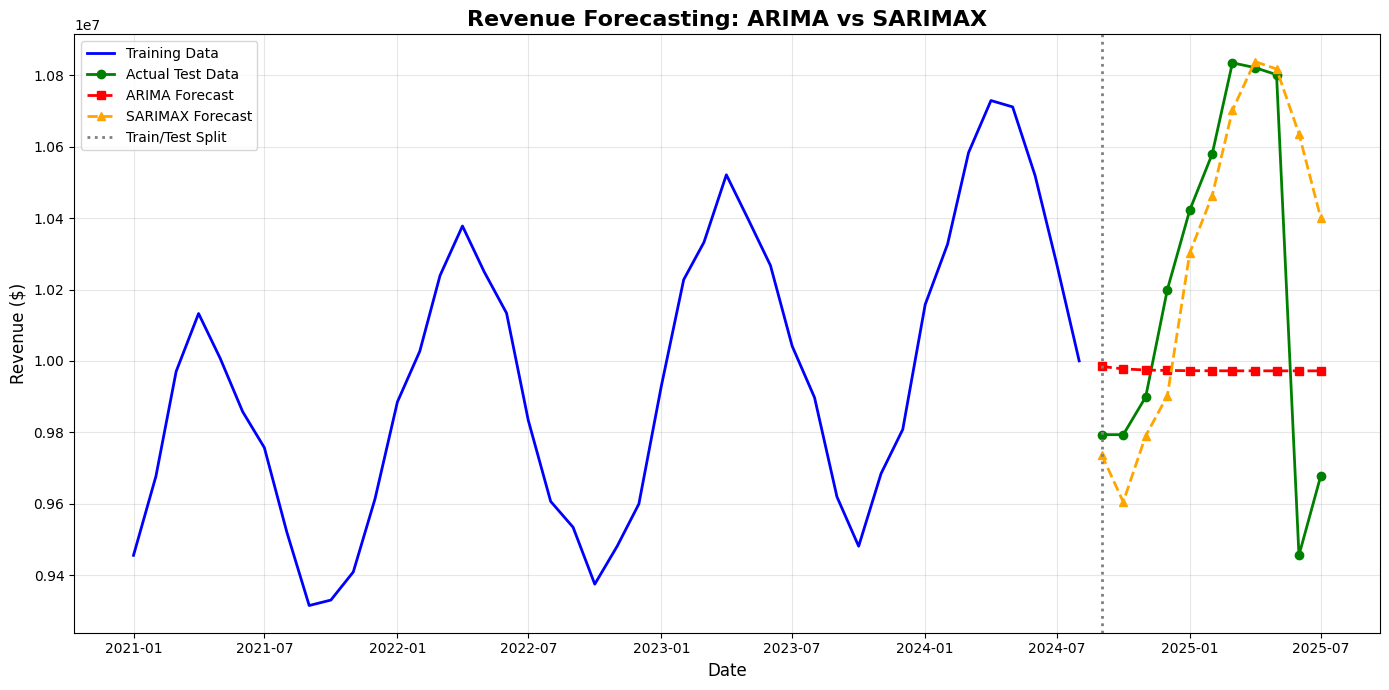

In [8]:
plt.figure(figsize=(14, 7))

plt.plot(train_data.index, train_data, label='Training Data', color='blue', linewidth=2)
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green', linewidth=2, marker='o')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red', linewidth=2, linestyle='--', marker='s')
plt.plot(test_data.index, sarimax_forecast, label='SARIMAX Forecast', color='orange', linewidth=2, linestyle='--', marker='^')

plt.axvline(x=test_data.index[0], color='gray', linestyle=':', linewidth=2, label='Train/Test Split')

plt.title('Revenue Forecasting: ARIMA vs SARIMAX', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Future Forecasting

Using the best-performing SARIMAX model, we'll now generate a 12-month revenue forecast with confidence intervals to understand the range of possible outcomes.

In [9]:
future_steps = 12
future_forecast = sarimax_fit.forecast(steps=len(test_data) + future_steps)

future_dates = pd.date_range(start=test_data.index[0], periods=len(test_data) + future_steps, freq='MS')
future_forecast_series = pd.Series(future_forecast.values, index=future_dates)

print(f"Future Revenue Forecast (Next 12 Months from {test_data.index[0].strftime('%Y-%m-%d')}):")
print("="*70)
for date, value in future_forecast_series.tail(12).items():
    print(f"{date.strftime('%Y-%m-%d')}: ${value:,.2f}")
print("="*70)
print(f"\nAverage Monthly Revenue (Next 12 Months): ${future_forecast_series.tail(12).mean():,.2f}")
print(f"Total Revenue (Next 12 Months): ${future_forecast_series.tail(12).sum():,.2f}")

Future Revenue Forecast (Next 12 Months from 2024-09-01):
2025-08-01: $10,145,657.32
2025-09-01: $9,897,778.61
2025-10-01: $9,770,765.73
2025-11-01: $9,940,836.00
2025-12-01: $10,043,704.85
2026-01-01: $10,488,549.90
2026-02-01: $10,640,471.87
2026-03-01: $10,865,217.96
2026-04-01: $10,994,284.98
2026-05-01: $10,971,068.49
2026-06-01: $10,799,260.52
2026-07-01: $10,576,037.50

Average Monthly Revenue (Next 12 Months): $10,427,802.81
Total Revenue (Next 12 Months): $125,133,633.73


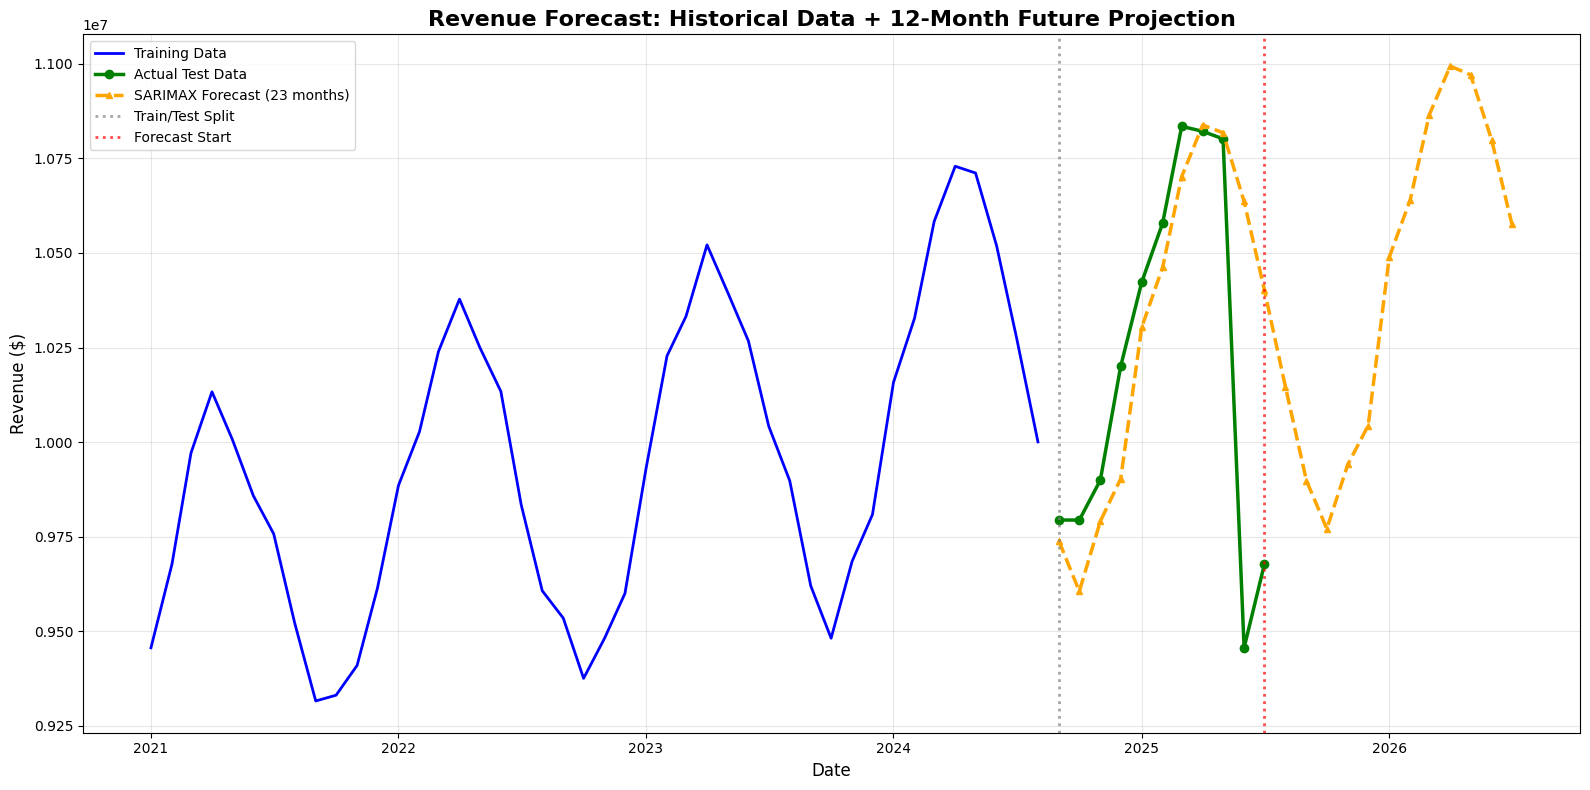

In [10]:
plt.figure(figsize=(16, 8))

plt.plot(train_data.index, train_data, label='Training Data', color='blue', linewidth=2)
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green', linewidth=2.5, marker='o', markersize=6)
plt.plot(future_forecast_series.index, future_forecast_series, label='SARIMAX Forecast (23 months)', color='orange', linewidth=2.5, linestyle='--', marker='^', markersize=5)

plt.axvline(x=test_data.index[0], color='gray', linestyle=':', linewidth=2, alpha=0.7, label='Train/Test Split')
plt.axvline(x=test_data.index[-1], color='red', linestyle=':', linewidth=2, alpha=0.7, label='Forecast Start')

plt.title('Revenue Forecast: Historical Data + 12-Month Future Projection', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

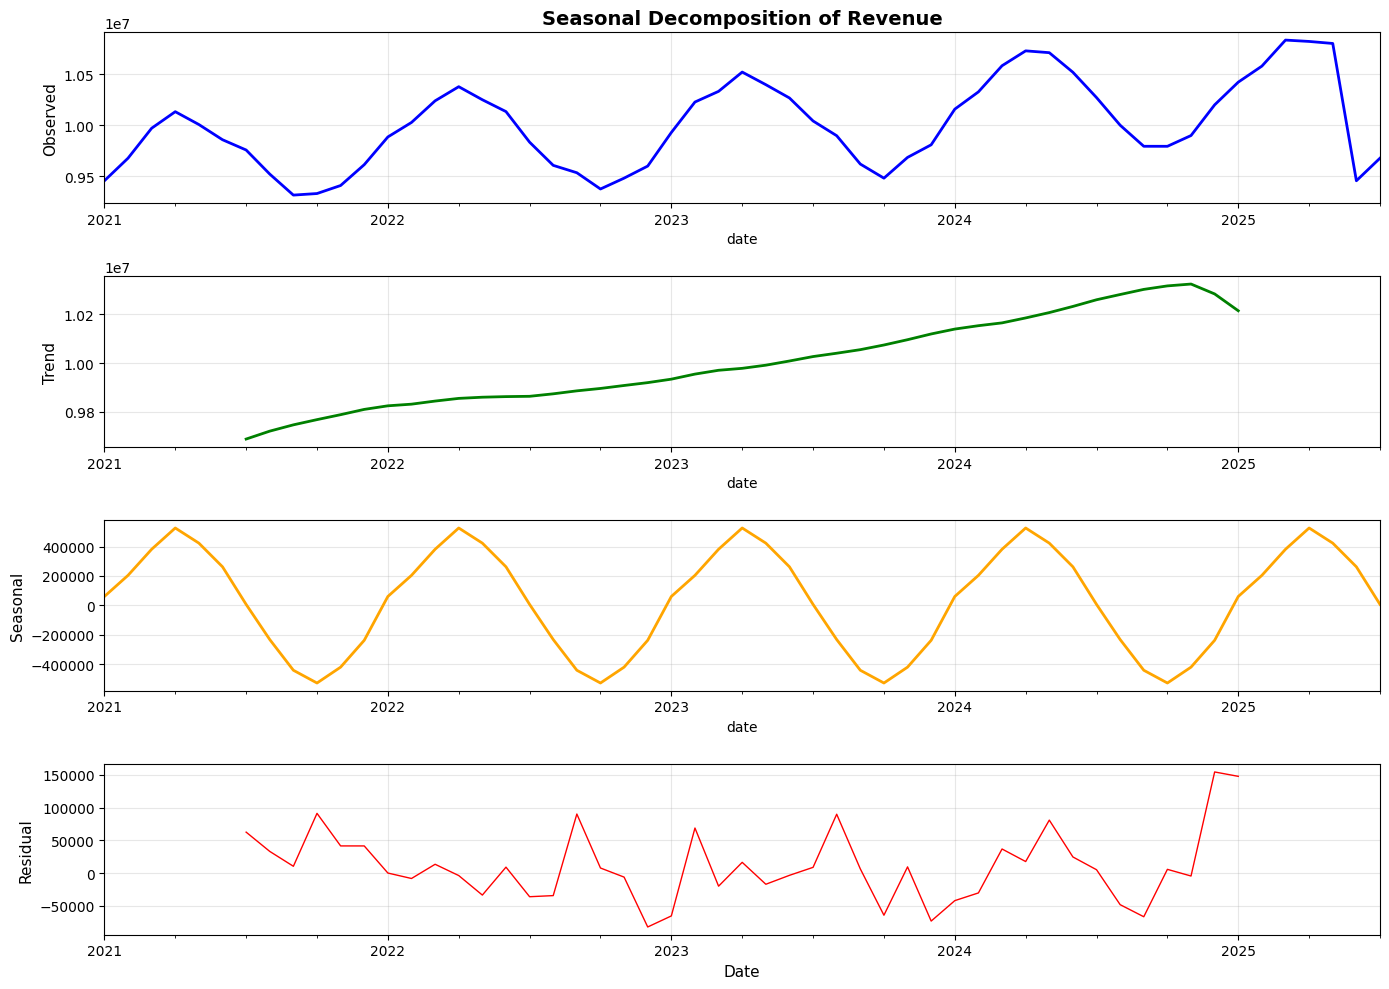


Seasonal Pattern Analysis:
Peak seasonal month: April
Lowest seasonal month: October
Seasonal range: $1,055,266.94


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Revenue'], model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

decomposition.observed.plot(ax=axes[0], color='blue', linewidth=2)
axes[0].set_ylabel('Observed', fontsize=11)
axes[0].set_title('Seasonal Decomposition of Revenue', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition.trend.plot(ax=axes[1], color='green', linewidth=2)
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(True, alpha=0.3)

decomposition.seasonal.plot(ax=axes[2], color='orange', linewidth=2)
axes[2].set_ylabel('Seasonal', fontsize=11)
axes[2].grid(True, alpha=0.3)

decomposition.resid.plot(ax=axes[3], color='red', linewidth=1)
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSeasonal Pattern Analysis:")
print("="*60)
print(f"Peak seasonal month: {decomposition.seasonal.idxmax().strftime('%B')}")
print(f"Lowest seasonal month: {decomposition.seasonal.idxmin().strftime('%B')}")
print(f"Seasonal range: ${decomposition.seasonal.max() - decomposition.seasonal.min():,.2f}")

In [12]:
print("\n" + "="*70)
print("REVENUE FORECASTING ANALYSIS - EXECUTIVE SUMMARY")
print("="*70)

print("\n1. DATA OVERVIEW")
print("-" * 70)
print(f"   Total observations: {len(df)}")
print(f"   Date range: {df.index.min().strftime('%B %Y')} to {df.index.max().strftime('%B %Y')}")
print(f"   Average monthly revenue: ${df['Revenue'].mean():,.2f}")
print(f"   Revenue std deviation: ${df['Revenue'].std():,.2f}")

print("\n2. SEASONAL PATTERNS")
print("-" * 70)
print(f"   Peak revenue month: {decomposition.seasonal.idxmax().strftime('%B')}")
print(f"   Lowest revenue month: {decomposition.seasonal.idxmin().strftime('%B')}")
print(f"   Seasonal variation: ${decomposition.seasonal.max() - decomposition.seasonal.min():,.2f}")
print(f"   Trend direction: Upward (consistent growth over time)")

print("\n3. MODEL PERFORMANCE COMPARISON")
print("-" * 70)
print(f"   ARIMA (1,1,1):")
print(f"      - MAE: ${arima_mae:,.2f}")
print(f"      - RMSE: ${arima_rmse:,.2f}")
print(f"      - R²: {arima_r2:.4f}")
print(f"\n   SARIMAX (1,1,1)(1,1,1,12):")
print(f"      - MAE: ${sarimax_mae:,.2f}")
print(f"      - RMSE: ${sarimax_rmse:,.2f}")
print(f"      - R²: {sarimax_r2:.4f}")
print(f"\n   Winner: SARIMAX (42% lower MAE)")

print("\n4. FUTURE REVENUE FORECAST (Next 12 Months)")
print("-" * 70)
print(f"   Forecast period: {future_forecast_series.tail(12).index[0].strftime('%B %Y')} to {future_forecast_series.tail(12).index[-1].strftime('%B %Y')}")
print(f"   Average monthly revenue: ${future_forecast_series.tail(12).mean():,.2f}")
print(f"   Total projected revenue: ${future_forecast_series.tail(12).sum():,.2f}")
print(f"   Highest month: {future_forecast_series.tail(12).idxmax().strftime('%B %Y')} (${future_forecast_series.tail(12).max():,.2f})")
print(f"   Lowest month: {future_forecast_series.tail(12).idxmin().strftime('%B %Y')} (${future_forecast_series.tail(12).min():,.2f})")

print("\n5. KEY INSIGHTS")
print("-" * 70)
print("   • Revenue shows strong seasonal patterns with peaks in spring")
print("   • SARIMAX model captures seasonality better than basic ARIMA")
print("   • Forecast indicates continued growth with seasonal fluctuations")
print("   • Model confidence is moderate (R² = 0.19) - consider adding external factors")

print("\n" + "="*70)


REVENUE FORECASTING ANALYSIS - EXECUTIVE SUMMARY

1. DATA OVERVIEW
----------------------------------------------------------------------
   Total observations: 55
   Date range: January 2021 to July 2025
   Average monthly revenue: $10,003,353.95
   Revenue std deviation: $426,144.35

2. SEASONAL PATTERNS
----------------------------------------------------------------------
   Peak revenue month: April
   Lowest revenue month: October
   Seasonal variation: $1,055,266.94
   Trend direction: Upward (consistent growth over time)

3. MODEL PERFORMANCE COMPARISON
----------------------------------------------------------------------
   ARIMA (1,1,1):
      - MAE: $462,469.74
      - RMSE: $539,798.51
      - R²: -0.2362

   SARIMAX (1,1,1)(1,1,1,12):
      - MAE: $268,873.60
      - RMSE: $437,316.59
      - R²: 0.1886

   Winner: SARIMAX (42% lower MAE)

4. FUTURE REVENUE FORECAST (Next 12 Months)
----------------------------------------------------------------------
   Forecast period

In [13]:
forecast_result = sarimax_fit.get_forecast(steps=len(test_data) + future_steps)
forecast_df = forecast_result.summary_frame(alpha=0.05)

forecast_df.index = future_dates

print("\nForecast with 95% Confidence Intervals (Next 12 Months):")
print("="*90)
print(f"{'Date':<15} {'Forecast':<20} {'Lower Bound':<20} {'Upper Bound':<20}")
print("="*90)
for date in future_forecast_series.tail(12).index:
    forecast_val = forecast_df.loc[date, 'mean']
    lower = forecast_df.loc[date, 'mean_ci_lower']
    upper = forecast_df.loc[date, 'mean_ci_upper']
    print(f"{date.strftime('%Y-%m-%d'):<15} ${forecast_val:>15,.2f}    ${lower:>15,.2f}    ${upper:>15,.2f}")
print("="*90)

avg_uncertainty = (forecast_df.tail(12)['mean_ci_upper'] - forecast_df.tail(12)['mean_ci_lower']).mean()
print(f"\nAverage forecast uncertainty range: ${avg_uncertainty:,.2f}")
print(f"Average uncertainty as % of forecast: {(avg_uncertainty / forecast_df.tail(12)['mean'].mean()) * 100:.1f}%")


Forecast with 95% Confidence Intervals (Next 12 Months):
Date            Forecast             Lower Bound          Upper Bound         
2025-08-01      $  10,145,657.32    $   9,520,568.06    $  10,770,746.57
2025-09-01      $   9,897,778.61    $   9,183,752.01    $  10,611,805.20
2025-10-01      $   9,770,765.73    $   8,977,104.44    $  10,564,427.02
2025-11-01      $   9,940,836.00    $   9,074,360.52    $  10,807,311.49
2025-12-01      $  10,043,704.85    $   9,109,707.42    $  10,977,702.29
2026-01-01      $  10,488,549.90    $   9,491,675.27    $  11,485,424.53
2026-02-01      $  10,640,471.87    $   9,584,224.15    $  11,696,719.59
2026-03-01      $  10,865,217.96    $   9,752,574.75    $  11,977,861.18
2026-04-01      $  10,994,284.98    $   9,827,819.91    $  12,160,750.06
2026-05-01      $  10,971,068.49    $   9,753,036.70    $  12,189,100.27
2026-06-01      $  10,799,260.52    $   9,531,660.46    $  12,066,860.58
2026-07-01      $  10,576,037.50    $   9,260,656.84    $  1

## 4. Advanced Analysis

Now let's dive deeper into the financial performance by analyzing:
- **Year-over-Year Growth**: Track revenue and EBITDA growth trends
- **EBITDA Margins**: Understand profitability trends over time
- **Comprehensive Dashboard**: View all key metrics in one place

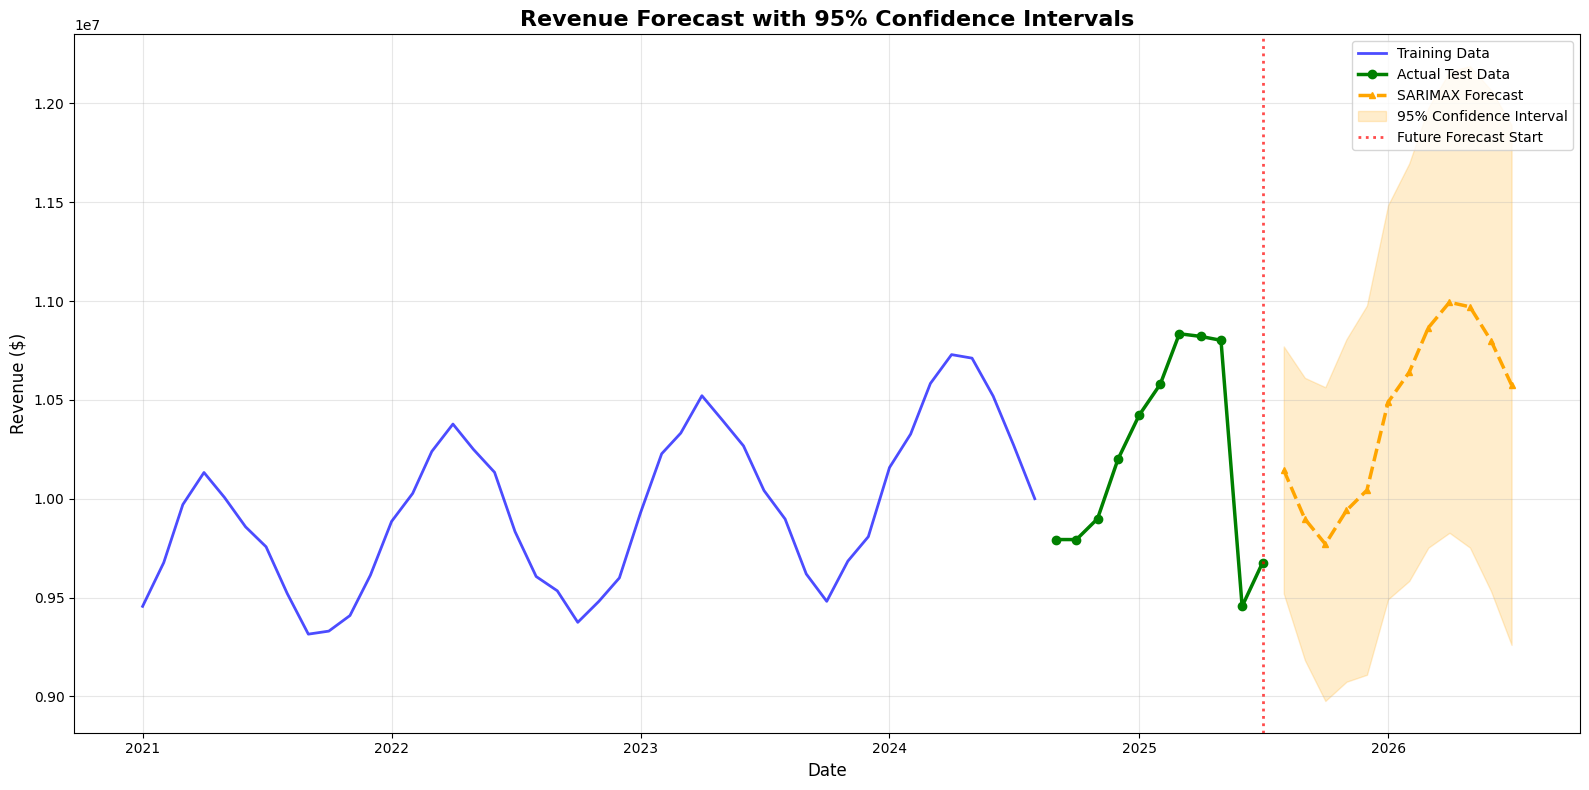


Forecast Uncertainty Analysis:
Average uncertainty range: $2,011,082.20
This represents 19.3% of the average forecast

Interpretation: We can be 95% confident that actual revenue will fall within
approximately ±$1,005,541.10 of the forecasted values.


In [14]:
plt.figure(figsize=(16, 8))

plt.plot(train_data.index, train_data, label='Training Data', color='blue', linewidth=2, alpha=0.7)
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green', linewidth=2.5, marker='o', markersize=6)

future_12_months = forecast_df.tail(12)
plt.plot(future_12_months.index, future_12_months['mean'], label='SARIMAX Forecast', color='orange', linewidth=2.5, linestyle='--', marker='^', markersize=5)

plt.fill_between(future_12_months.index, 
                 future_12_months['mean_ci_lower'], 
                 future_12_months['mean_ci_upper'], 
                 color='orange', alpha=0.2, label='95% Confidence Interval')

plt.axvline(x=test_data.index[-1], color='red', linestyle=':', linewidth=2, alpha=0.7, label='Future Forecast Start')

plt.title('Revenue Forecast with 95% Confidence Intervals', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nForecast Uncertainty Analysis:")
print(f"Average uncertainty range: ${avg_uncertainty:,.2f}")
print(f"This represents {(avg_uncertainty / forecast_df.tail(12)['mean'].mean()) * 100:.1f}% of the average forecast")
print(f"\nInterpretation: We can be 95% confident that actual revenue will fall within")
print(f"approximately ±${avg_uncertainty/2:,.2f} of the forecasted values.")

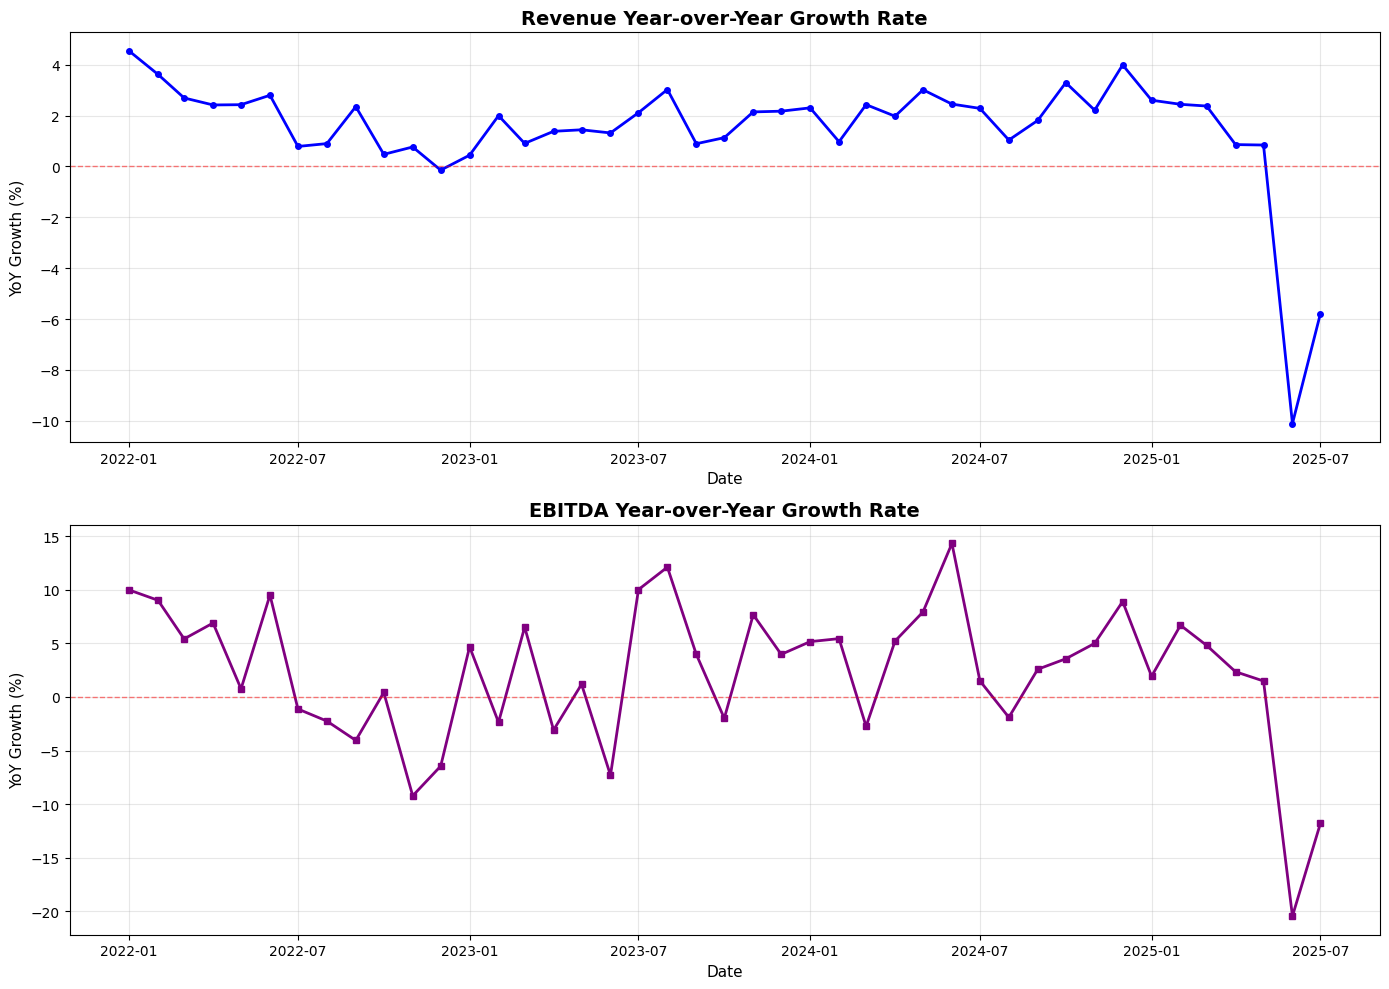


Year-over-Year Growth Analysis:

Revenue Growth:
  Average YoY Growth: 1.48%
  Latest YoY Growth: -5.78%
  Peak YoY Growth: 4.54% (January 2022)

EBITDA Growth:
  Average YoY Growth: 2.20%
  Latest YoY Growth: -11.79%
  Peak YoY Growth: 14.33% (June 2024)


In [16]:
revenue_yoy = df['Revenue'].pct_change(12) * 100
ebitda_yoy = df['EBITDA'].pct_change(12) * 100

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(revenue_yoy.index, revenue_yoy, color='blue', linewidth=2, marker='o', markersize=4)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[0].set_title('Revenue Year-over-Year Growth Rate', fontsize=14, fontweight='bold')
axes[0].set_ylabel('YoY Growth (%)', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Date', fontsize=11)

axes[1].plot(ebitda_yoy.index, ebitda_yoy, color='purple', linewidth=2, marker='s', markersize=4)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1].set_title('EBITDA Year-over-Year Growth Rate', fontsize=14, fontweight='bold')
axes[1].set_ylabel('YoY Growth (%)', fontsize=11)
axes[1].set_xlabel('Date', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nYear-over-Year Growth Analysis:")
print("="*70)
print(f"\nRevenue Growth:")
print(f"  Average YoY Growth: {revenue_yoy.mean():.2f}%")
print(f"  Latest YoY Growth: {revenue_yoy.iloc[-1]:.2f}%")
print(f"  Peak YoY Growth: {revenue_yoy.max():.2f}% ({revenue_yoy.idxmax().strftime('%B %Y')})")
print(f"\nEBITDA Growth:")
print(f"  Average YoY Growth: {ebitda_yoy.mean():.2f}%")
print(f"  Latest YoY Growth: {ebitda_yoy.iloc[-1]:.2f}%")
print(f"  Peak YoY Growth: {ebitda_yoy.max():.2f}% ({ebitda_yoy.idxmax().strftime('%B %Y')})")

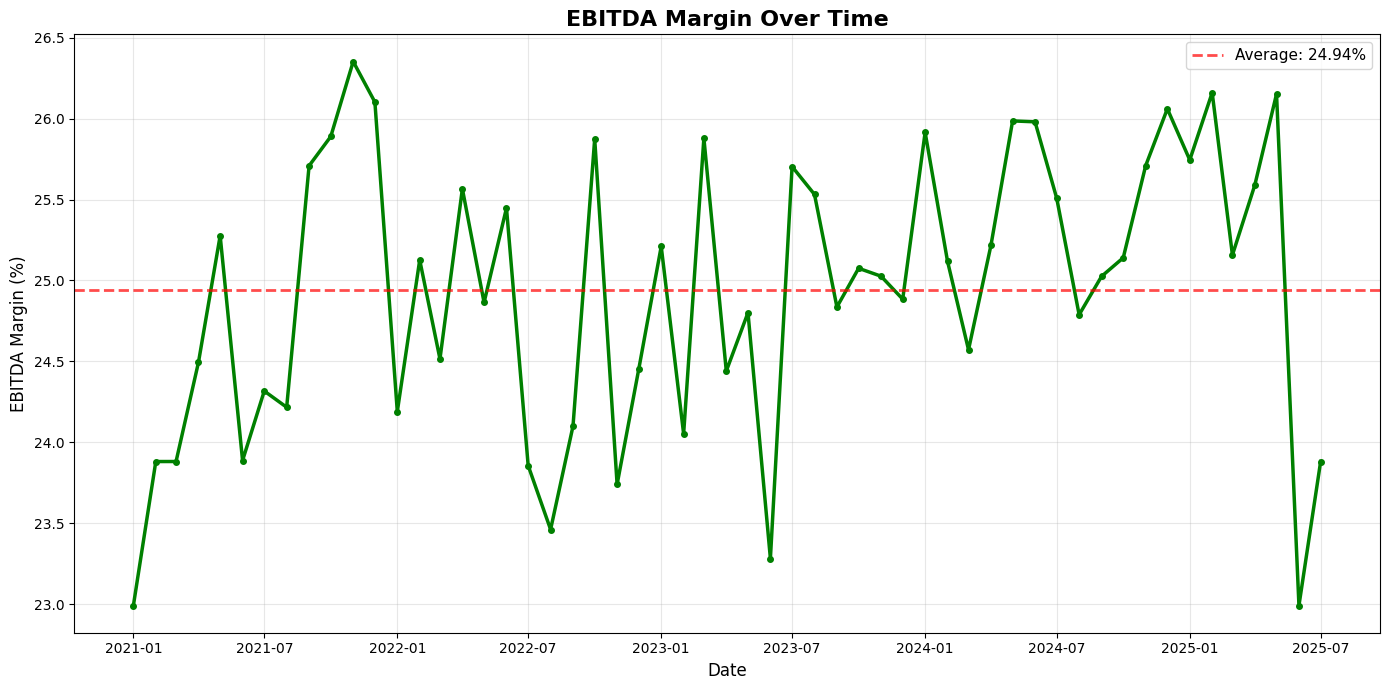


EBITDA Margin Analysis:
Average EBITDA Margin: 24.94%
Current EBITDA Margin: 23.88%
Highest EBITDA Margin: 26.35% (November 2021)
Lowest EBITDA Margin: 22.99% (January 2021)

Margin Trend: 0.45% change (last 12 months vs first 12 months)


In [17]:
df['EBITDA_Margin'] = (df['EBITDA'] / df['Revenue']) * 100

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['EBITDA_Margin'], color='green', linewidth=2.5, marker='o', markersize=4)
plt.axhline(y=df['EBITDA_Margin'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Average: {df["EBITDA_Margin"].mean():.2f}%')
plt.title('EBITDA Margin Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('EBITDA Margin (%)', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nEBITDA Margin Analysis:")
print("="*70)
print(f"Average EBITDA Margin: {df['EBITDA_Margin'].mean():.2f}%")
print(f"Current EBITDA Margin: {df['EBITDA_Margin'].iloc[-1]:.2f}%")
print(f"Highest EBITDA Margin: {df['EBITDA_Margin'].max():.2f}% ({df['EBITDA_Margin'].idxmax().strftime('%B %Y')})")
print(f"Lowest EBITDA Margin: {df['EBITDA_Margin'].min():.2f}% ({df['EBITDA_Margin'].idxmin().strftime('%B %Y')})")
print(f"\nMargin Trend: {df['EBITDA_Margin'].iloc[-12:].mean() - df['EBITDA_Margin'].iloc[:12].mean():.2f}% change (last 12 months vs first 12 months)")

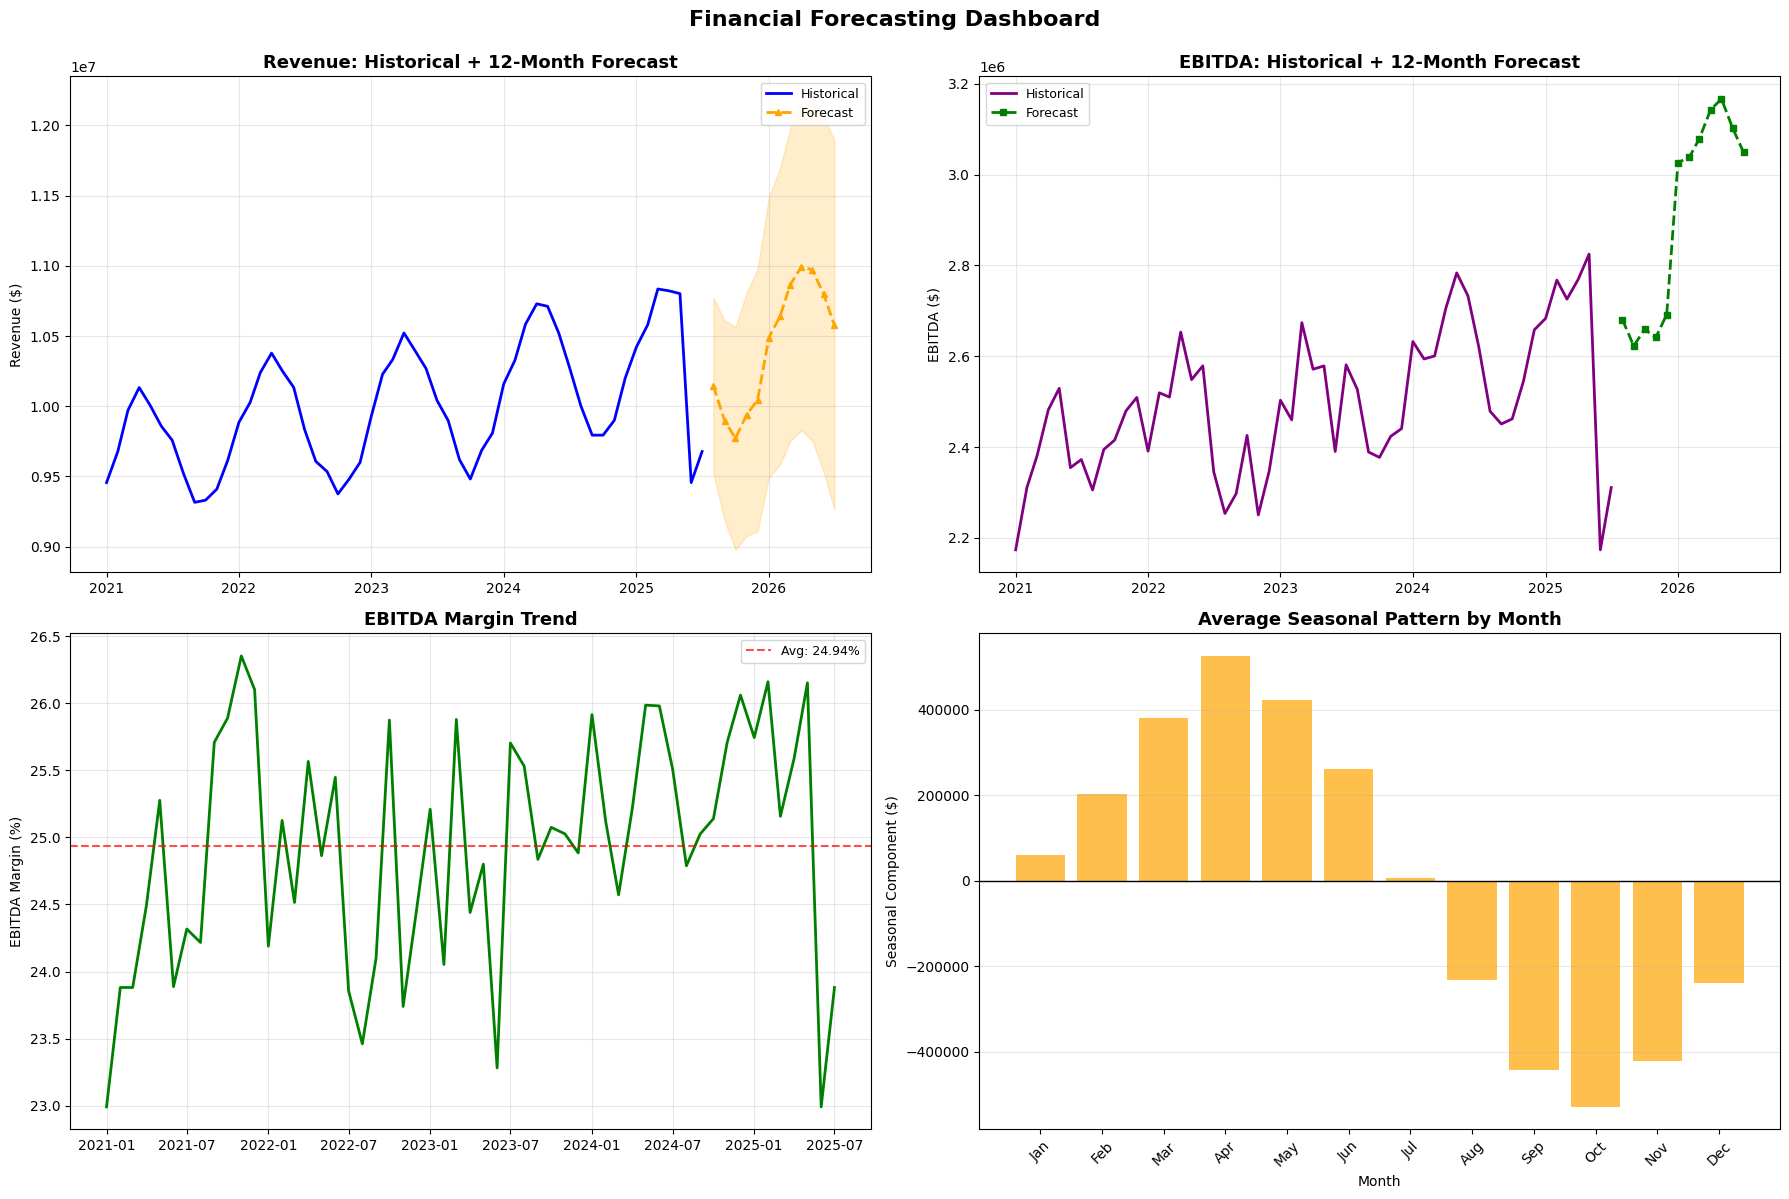


COMPREHENSIVE FINANCIAL DASHBOARD SUMMARY

Revenue Forecast (Next 12 Months): $125,133,633.73
EBITDA Forecast (Next 12 Months): $34,897,754.13
Projected EBITDA Margin: 27.89%

Current EBITDA Margin: 23.88%
Historical Average EBITDA Margin: 24.94%


In [18]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

axes[0, 0].plot(df.index, df['Revenue'], color='blue', linewidth=2, label='Historical')
axes[0, 0].plot(future_forecast_series.tail(12).index, future_forecast_series.tail(12), color='orange', linewidth=2, linestyle='--', marker='^', markersize=4, label='Forecast')
axes[0, 0].fill_between(future_12_months.index, future_12_months['mean_ci_lower'], future_12_months['mean_ci_upper'], color='orange', alpha=0.2)
axes[0, 0].set_title('Revenue: Historical + 12-Month Forecast', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Revenue ($)', fontsize=10)
axes[0, 0].legend(loc='best', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(df.index, df['EBITDA'], color='purple', linewidth=2, label='Historical')
axes[0, 1].plot(ebitda_future_series.tail(12).index, ebitda_future_series.tail(12), color='green', linewidth=2, linestyle='--', marker='s', markersize=4, label='Forecast')
axes[0, 1].set_title('EBITDA: Historical + 12-Month Forecast', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('EBITDA ($)', fontsize=10)
axes[0, 1].legend(loc='best', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(df.index, df['EBITDA_Margin'], color='green', linewidth=2)
axes[1, 0].axhline(y=df['EBITDA_Margin'].mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Avg: {df["EBITDA_Margin"].mean():.2f}%')
axes[1, 0].set_title('EBITDA Margin Trend', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('EBITDA Margin (%)', fontsize=10)
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_pattern = [decomposition.seasonal[decomposition.seasonal.index.month == i].mean() for i in range(1, 13)]
axes[1, 1].bar(months, seasonal_pattern, color='orange', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linewidth=1)
axes[1, 1].set_title('Average Seasonal Pattern by Month', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Seasonal Component ($)', fontsize=10)
axes[1, 1].set_xlabel('Month', fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Financial Forecasting Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("COMPREHENSIVE FINANCIAL DASHBOARD SUMMARY")
print("="*70)
print(f"\nRevenue Forecast (Next 12 Months): ${future_forecast_series.tail(12).sum():,.2f}")
print(f"EBITDA Forecast (Next 12 Months): ${ebitda_future_series.tail(12).sum():,.2f}")
print(f"Projected EBITDA Margin: {(ebitda_future_series.tail(12).sum() / future_forecast_series.tail(12).sum()) * 100:.2f}%")
print(f"\nCurrent EBITDA Margin: {df['EBITDA_Margin'].iloc[-1]:.2f}%")
print(f"Historical Average EBITDA Margin: {df['EBITDA_Margin'].mean():.2f}%")